In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
def extract_arch(model):
    vit,*rest = model.split(" ")
    return {
        "ViT-L-14-336": "ViT-L-14_336",
        "ViT-B-16-plus-240": "ViT-B-16-plus",
        "ViT-B-32-quickgelu": "ViT-B-32"
    }.get(vit, vit)


def extract_samples_seen(model):
    return {
        "ViT-B-32 openai": 400*(10**6)*32,
        "ViT-B-16 openai": 400*(10**6)*32,
        "ViT-L-14-336 openai": 400*(10**6)*32,
        "ViT-L-14 openai": 400*(10**6)*32,

        "ViT-B-16-plus-240 laion400m_e32": 407332084*32,
        "ViT-B-16 laion400m_e32": 407332084*32,
        "ViT-B-32 laion2b_e16": 16*2139877172, # source?
        "ViT-B-32 laion2B-s34B-b79K": 256 * 135 * 10**6, # source: https://docs.google.com/document/d/1EFbMLRWSSV0LUf9Du1pWzWqgeiIRPwEWX2s1C6mAk5c/edit
        "ViT-B-32-quickgelu laion400m_e32": 407332084*32,
        "ViT-L-14 laion400m_e32": 407332084*32,
        "ViT-L-14 /fsx/rwightman/epoch_160.pt": 32000000000, # source: https://huggingface.co/laion/CLIP-ViT-L-14-laion2B-s32B-b82K

        "ViT-g-14 /fsx/rom1504/open_clip/good_models/g_90.pt":90 * 135*10**6, #source:https://docs.google.com/document/d/1EFbMLRWSSV0LUf9Du1pWzWqgeiIRPwEWX2s1C6mAk5c/edit
        "ViT-H-14 /fsx/rom1504/open_clip/good_models/h_256.pt": 32*10**9 # source:https://laion.ai/blog/large-openclip/
    }[model]
    
    """
    # Total number of images seen by the model 
    # (consdering the total epochs, depeinding on the model)
    if "laion2b" in model or (model=="ViT-L-14 /fsx/rwightman/epoch_160.pt"):
        # 16 epochs, 2 billions images
        return (16 * 2 * 10**9)
    elif "ViT-H-14" in model:
        return 32*10**9
    elif "ViT-g-14" in model:
        return (12 *10**9)
    else:
        # 32 epochs, 400 millions images
        return (32 * 400 * 10**6)
    """
pd.options.display.float_format = '{:.3f}'.format
dataset_type = {
    "imagenet1k": "natural",
    "imagenetv2": "natural",
    "imagenet-r": "natural",
    "imagenet_sketch": "specialized",
    "objectnet": "natural",
    "imagenet-a": "natural",
    "imagenet-o": "natural",
    "flickr30k": "natural",
    "flickr8k": "natural",

    "mscoco_captions": "natural",
    
    "vtab/cifar10": "natural",
    "vtab/cifar100": "natural",
    "mnist": "specialized",

    "vtab/flowers": "natural",
    "cars": "natural",
    "vtab/svhn": "natural",
    "fer2013": "natural",
    "renderedsst2": "specialized",
    "vtab/pets": "natural",
    "vtab/caltech101": "natural",
    "voc2007_multilabel": "natural",    
    "voc2007": "natural",
    "sun397": "natural",
    "fgvc_aircraft": "natural",
    "country211": "natural",
    "vtab/dtd": "natural",
    "gtsrb": "natural",
    "stl10": "natural",

    "vtab/diabetic_retinopathy": "specialized",
    "vtab/eurosat": "specialized",
    "vtab/resisc45": "specialized",
    "vtab/pcam": "specialized",

    "vtab/clevr_count_all": "structured",
    "vtab/clevr_closest_object_distance": "structured",

    "vtab/dsprites_label_orientation": "structured",
    "vtab/dsprites_label_x_position": "structured",

    "vtab/smallnorb_label_elevation": "structured",
    "vtab/smallnorb_label_azimuth": "structured",

    "vtab/dmlab": "structured",
    "vtab/kitti_closest_vehicle_distance": "structured",
}
dataset_order = list(dataset_type.keys())


pretty_dataset = {
    "imagenet1k": "INet",
    "imagenetv2": "INet-v2",
    "imagenet-r": "INet-R",
    "imagenet-a": "INet-A",
    "imagenet-o": "INet-O",
    "imagenet_sketch": "INet-S",
    "objectnet": "ObjNet",
    "vtab+": "VTAB+",
    
    "vtab/flowers": "Flowers102",
    "cars": "Cars",
    "vtab/svhn": "SVHN",
    "fer2013": "FER2013",
    "renderedsst2": "RenderedSST2",
    "vtab/pets": "Pets",
    "vtab/caltech101": "Caltech-101",
    "vtab/cifar100": "CIFAR-100",
    
    "voc2007": "VOC2007-Cl",
    "sun397": "SUN397",
    "fgvc_aircraft": "FGVC Aircraft",
    "country211": "Country211",
    "vtab/cifar10": "CIFAR-10",
    "vtab/dtd": "DTD",
    "gtsrb": "GTSRB",
    "stl10": "STL10",
    "vtab/diabetic_retinopathy": "Retino",
    "vtab/eurosat": "EuroSAT",
    "vtab/resisc45": "RESISC45",
    "vtab/pcam": "PCAM",
    "mnist": "MNIST",
    "vtab/clevr_count_all": "CLEVR Counts",
    "vtab/dsprites_label_orientation": "DSPRITES Orient",
    "vtab/clevr_closest_object_distance": "CLEVR Dist",
    "vtab/smallnorb_label_elevation": "SmallNORB Elv",
    "vtab/dmlab": "DMLAB",
    "vtab/kitti_closest_vehicle_distance": "KITTI Dist",
    "vtab/dsprites_label_x_position": "DSPRITES pos",
    "vtab/smallnorb_label_azimuth": "SmallNORB Azim",
    
}

full_dataset_name = {
    "imagenet1k": "ImageNet-1k",
    "imagenetv2": "ImageNet-v2",
    "imagenet-r": "ImageNet-R",
    "imagenet-a": "ImageNet-A",
    "imagenet-o": "ImageNet-O",
    "imagenet_sketch": "ImageNet Sketch",
    "objectnet": "ObjectNet",
    "vtab+": "VTAB+",
    
    "vtab/flowers": "Oxford Flowers 102",
    "cars": "Stanford Cars",
    "vtab/svhn": "SVHN",
    "fer2013": "Facial Emotion Recognition 2013",
    "renderedsst2": "RenderedSST2",
    "vtab/pets": "Oxford-IIIT Pets",
    "vtab/caltech101": "Caltech-101",
    "vtab/cifar100": "CIFAR-100",
    
    "voc2007": "Pascal VOC 2007 Classification",
    "sun397": "SUN397",
    "fgvc_aircraft": "FGVC Aircraft",
    "country211": "Country211",
    "vtab/cifar10": "CIFAR-10",
    "vtab/dtd": "Describable Textures",
    "gtsrb": "GTSRB",
    "stl10": "STL10",
    "vtab/diabetic_retinopathy": "Diabetic Retinopathy",
    "vtab/eurosat": "EuroSAT",
    "vtab/resisc45": "RESISC45",
    "vtab/pcam": "PatchCamelyon",
    "mnist": "MNIST",
    "vtab/clevr_count_all": "CLEVR Counts",
    "vtab/dsprites_label_orientation": "DSPRITES Orientation",
    "vtab/clevr_closest_object_distance": "CLEVR Object Distance",
    "vtab/smallnorb_label_elevation": "SmallNORB Elevation",
    "vtab/dmlab": "DMLAB",
    "vtab/kitti_closest_vehicle_distance": "KITTI closest vehicle distance",
    "vtab/dsprites_label_x_position": "DSPRITES Position",
    "vtab/smallnorb_label_azimuth": "SmallNORB Azimuth",
    
}



pretty_model = {
 "ViT-L-14-336 openai": ("L/14-336", "CLIP WIT"),
 "ViT-L-14 openai": ("L/14", "CLIP WIT"),
 "ViT-B-16-plus-240 laion400m_e32": ("B/16+", "LAION-400M"),
 "ViT-B-16 laion400m_e32": ("B/16", "LAION-400M"),
 "ViT-B-16 openai": ("B/16", "CLIP WIT"),
 "ViT-B-32 laion2b_e16": ("B/32", "LAION-2B"),
 #"ViT-B-32 laion2b_s34b_b79k": ("B/32", "LAION-2B"),
 "ViT-B-32-quickgelu laion400m_e32": ("B/32", "LAION-400M"),
 "ViT-B-32 openai": ("B/32", "CLIP WIT"),
 "ViT-L-14 laion400m_e32": ("L/14", "LAION-400M"),
 "ViT-L-14 /fsx/rwightman/epoch_160.pt": ("L/14", "LAION-2B"),

 "ViT-g-14 /fsx/rom1504/open_clip/good_models/g_90.pt": ("g/14", "LAION-2B"),
 "ViT-H-14 /fsx/rom1504/open_clip/good_models/h_256.pt": ("H/14", "LAION-2B"),
}
pretty_model_inv = {v:k for k,v in pretty_model.items()}
def model_fullname_pretty(m):
    arch, dataset = pretty_model[m]
    dataset = dataset.split("-")[1] if "-" in dataset else dataset
    return f"{arch} {dataset}"
    """
    return {
        "ViT-B-16-plus-240 laion400m_e32": "ViT-B/16+ (400M)",
        "ViT-B-16 laion400m_e32": "ViT-B/16 (400M)",
        
        "ViT-B-32 laion2b_e16": "ViT-B/32 (2B)",
        "ViT-B-32 laion2b-s34B-b79K": "ViT-B/32 (2B)",

        "ViT-B-32-quickgelu laion400m_e32": "ViT-B/32 (400M)",
        "ViT-L-14 openai": "ViT-L/14",        
        "ViT-L-14-336 openai": "ViT-L-14-336",
        "ViT-L-14 laion400m_e32": "ViT-L/14 (400M)",
        "ViT-L-14 /fsx/rwightman/epoch_160.pt": "ViT-L/14 (2B)",
        "ViT-g-14 /fsx/rom1504/open_clip/good_models/g_90.pt": "ViT-g/14 (2B)",
        "ViT-H-14 /fsx/rom1504/open_clip/good_models/h_256.pt": "ViT-H/14 (2B)",

    }.get(m, m)
    """
# Models to consider
modelnames = [
    'ViT-B-16-plus-240 laion400m_e32',
    'ViT-B-32 laion2b_e16',
    #"ViT-B-32 laion2b_s34b_b79k",

    'ViT-B-32-quickgelu laion400m_e32', 
    'ViT-B-16 laion400m_e32',
    'ViT-L-14 laion400m_e32',
    "ViT-L-14 /fsx/rwightman/epoch_160.pt",
    "ViT-g-14 /fsx/rom1504/open_clip/good_models/g_90.pt",
    "ViT-H-14 /fsx/rom1504/open_clip/good_models/h_256.pt",
    
    'ViT-L-14 openai',
    'ViT-B-16 openai',
    'ViT-B-32 openai',
]


In [42]:
if not os.path.exists("clip_table.csv"):
    !wget https://gist.githubusercontent.com/rwightman/bd8042444955129e1a78810c93ec56e1/raw/6cafe7f31d06ff6848ecb43754729ef3b10f5b8b/clip_table.csv
if not os.path.exists("clip_table_2.csv"):
    !wget https://gist.githubusercontent.com/rwightman/bd8042444955129e1a78810c93ec56e1/raw/40f1daf3b725fb4ff464c6e6bc2f2e38d40aa251/clip_table_2.csv

In [97]:
df = pd.read_csv('clip_table_2.csv')
df['vit'] = df.model.str.contains('ViT')
act = df[df.vit]
act

,model,image_size,image_width,text_width,embed_dim,gmacs,macts,mparams,image_gmacs,image_macts,image_mparams,text_gmacs,text_macts,text_mparams,vit
0,ViT-B-32,224,768,512,512,7.400,10.310,151.280,4.410,5.010,87.850,2.980,5.300,63.430,True
1,ViT-B-32-plus-256,256,896,640,640,12.430,14.380,210.300,7.790,7.760,119.130,4.640,6.630,91.160,True
3,ViT-M-16,224,512,512,512,10.990,21.230,102.020,8.000,15.930,38.590,2.980,5.300,63.430,True
5,ViT-M-16-256,256,512,512,512,13.620,27.560,102.050,10.630,22.260,38.620,2.980,5.300,63.430,True
6,ViT-B-16,224,768,512,512,20.570,29.200,149.620,17.580,23.900,86.190,2.980,5.300,63.430,True
7,ViT-B-16-plus,224,896,640,640,28.410,34.500,208.350,23.770,27.880,117.190,4.640,6.630,91.160,True
8,ViT-B-16-plus-240,240,896,640,640,32.050,39.710,208.380,27.410,33.080,117.210,4.640,6.630,91.160,True
10,ViT-L-16,224,1024,768,768,68.260,71.470,427.740,61.600,63.520,304.090,6.660,7.950,123.650,True
11,ViT-L-14,224,1024,768,768,87.730,96.740,427.620,81.080,88.790,303.970,6.660,7.950,123.650,True
13,ViT-H-16,224,1280,1024,1024,150.960,122.010,986.260,127.400,100.810,632.230,23.570,21.200,354.030,True


In [129]:
df = pd.read_csv("benchmark.csv")
df.loc[:, "dataset_type"] = df.dataset.apply(lambda d:dataset_type[d])
df.loc[:, "model_arch"] = df.model.apply(extract_arch)
df = df[df.model_fullname.isin(modelnames)]
d = df
tasks_vtab_plus = d[ (~pd.isna(d.acc1)) & (d.dataset!="imagenet-o") ].dataset.unique()
tasks_vtab_plus = sorted(tasks_vtab_plus, key=lambda k:dataset_order.index(k))
nb_tasks_vtab_plus = len(tasks_vtab_plus)
d = d[d.dataset.isin(tasks_vtab_plus)]
d = d.groupby(["model_fullname", "model", "pretrained", "task", "model_arch"]).agg('mean').reset_index().sort_values(by='acc1', ascending=False)
d["dataset"] = "vtab+"
assert nb_tasks_vtab_plus == 35
df = pd.concat((d,df))

df["acc1"] *= 100
df["arch"] =  df["model_fullname"].apply(extract_arch)
df = pd.merge(df, act, left_on="arch", right_on="model")
df["samples_seen"] = df["model_fullname"].apply(extract_samples_seen)
df["macts_total"] = df["samples_seen"] * df["macts"]
df["gmacs_total"] = df["samples_seen"] * df["gmacs"]
df["model_fullname_pretty"] = df.model_fullname.apply(model_fullname_pretty)
print(df.columns)

Index(['model_fullname', 'model_x', 'pretrained', 'task', 'model_arch', 'acc1',
       'acc5', 'mean_per_class_recall', 'mean_average_precision',
       'image_retrieval_recall@5', 'text_retrieval_recall@5', 'dataset',
       'dataset_type', 'arch', 'model_y', 'image_size', 'image_width',
       'text_width', 'embed_dim', 'gmacs', 'macts', 'mparams', 'image_gmacs',
       'image_macts', 'image_mparams', 'text_gmacs', 'text_macts',
       'text_mparams', 'vit', 'samples_seen', 'macts_total', 'gmacs_total',
       'model_fullname_pretty'],
      dtype='object')


In [118]:
open_clip_results = df.copy()
open_clip_results = open_clip_results[~open_clip_results["model_fullname"].str.contains("openai")]
open_clip_results.loc[:, "upstream_dataset"] = open_clip_results.model_fullname.apply(lambda x:pretty_model[x][1])
open_clip_results.loc[:, "downstream_dataset"] = open_clip_results["dataset"]
open_clip_results.loc[:, "gmacs_per_sample"] = open_clip_results["gmacs"]
open_clip_results = open_clip_results[["model_arch", "acc1", "acc5", "mean_per_class_recall", "samples_seen", "gmacs_per_sample", "gmacs_total", "model_fullname_pretty", "upstream_dataset", "downstream_dataset"]]
open_clip_results[open_clip_results.downstream_dataset=="imagenet1k"].sort_values(by="acc1")

,model_arch,acc1,acc5,mean_per_class_recall,samples_seen,gmacs_per_sample,gmacs_total,model_fullname_pretty,upstream_dataset,downstream_dataset
361,ViT-B-32,62.918,0.877,0.629,13034626688,7.400,96456237491.200,B/32 400M,LAION-400M,imagenet1k
427,ViT-B-32,65.528,0.894,0.656,34238034752,7.400,253361457164.800,B/32 2B,LAION-2B,imagenet1k
266,ViT-B-16,67.002,0.904,0.670,13034626688,20.570,268122270972.160,B/16 400M,LAION-400M,imagenet1k
212,ViT-B-16-plus,69.090,0.914,0.692,13034626688,28.410,370313744206.080,B/16+ 400M,LAION-400M,imagenet1k
112,ViT-L-14,72.734,0.929,0.727,13034626688,87.730,1143527799338.240,L/14 400M,LAION-400M,imagenet1k
175,ViT-L-14,75.202,0.943,0.753,32000000000,87.730,2807360000000.000,L/14 2B,LAION-2B,imagenet1k
2,ViT-g-14,76.664,0.949,0.767,12150000000,290.740,3532491000000.000,g/14 2B,LAION-2B,imagenet1k
47,ViT-H-14,77.972,0.952,0.780,32000000000,190.970,6111040000000.000,H/14 2B,LAION-2B,imagenet1k


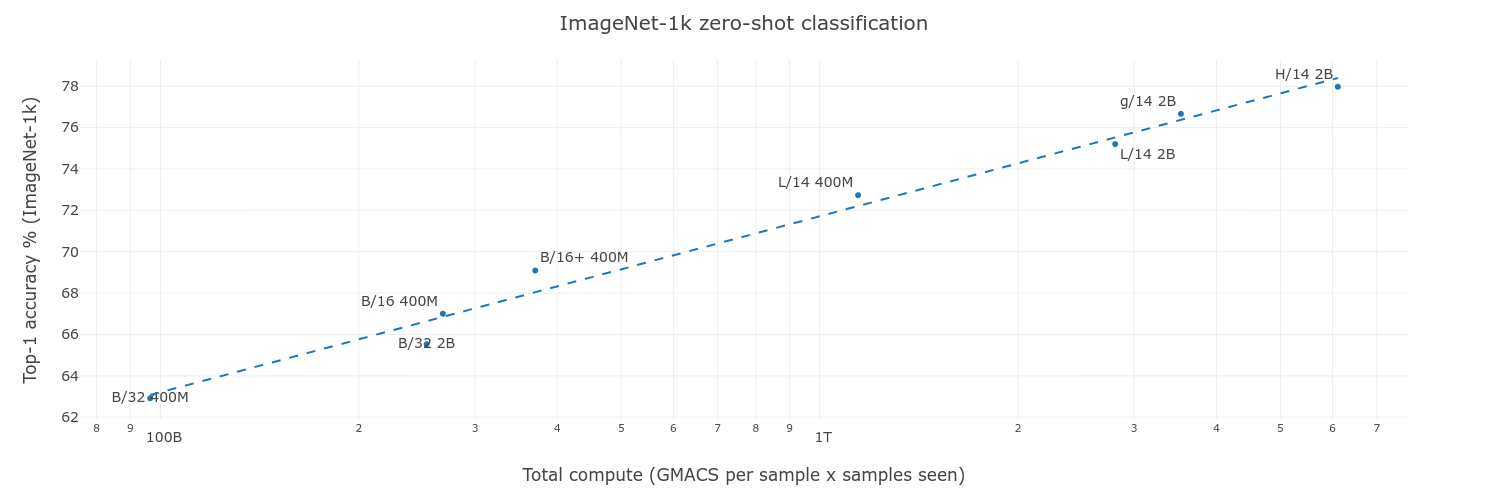

In [130]:
import plotly.express as px
#target = "vtab+"
target = "imagenet1k"
pretty = {
    "vtab+": "VTAB+",
    "imagenet1k": "ImageNet-1k"
}[target]
slug = {
    "vtab+": "vtab_plus",
    "imagenet1k": "ImageNet1k"
}[target]
metric = {
    "vtab+": "Avg. top-1 accuracy",
    "imagenet1k": "Top-1 accuracy",
}[target]
df_target = df[df.dataset==target].copy()
df_target = df_target[~df_target["model_fullname"].str.contains("openai")]

fig = px.scatter(
    data_frame=df_target, 
    x='gmacs_total',
    y='acc1', 
    text="model_fullname_pretty", 
    log_x=True, log_y=False,
    hover_name=df_target.index,
    trendline='ols',
    trendline_options=dict(log_x=True, log_y=False),
    height=500,
    width=600,
    template="none",
    #range_x=[85*10**9, 1200*10**9],
    #range_x=[80*10**9, 3000*10**9],
)
if target == "vtab+":
    #fig.update_traces(textposition=('top left', 'top left', 'top left', 'top left', 'top right')) - previous fig
    fig.update_traces(textposition=('top left','top left', 'top left', 'top left', 'top left', 'top right')) #  new fig
else:
    fig.update_traces(textposition=('top left', 'top left', 'top left', 'bottom right', 'top right', 'top left'))
fig.update_layout(
    title_text=f'{pretty} zero-shot classification', 
    title_x=0.5, 
    xaxis_title='Total compute (GMACS per sample x samples seen)', 
    yaxis_title=f'{metric} % ({pretty})',
    font=dict(
         size=14,
    )
)
fig.data[1].line.dash = 'dash'
fig.write_image(f"gmacs_vs_top1_{slug}.pdf")
fig.show()

In [134]:
def get_results(arch, pretraining, dataset, bold_best_overall=False, bold_best_arch=False, show_delta=True):
    model_fullname = pretty_model_inv[(arch, pretraining)]
    #print(model_fullname)
    d = df[ (df.model_fullname == model_fullname) & (df.dataset==dataset) ]
    assert len(d) == 1, (len(d), dataset)
    value = d.acc1.values[0]
    perf = round(value * 100, 1)
    
    archs = df_ext.model_fullname.apply(lambda s: pretty_model[s][0])
    pretraining = df_ext.model_fullname.apply(lambda s: pretty_model[s][1])
    
    d = df_ext[ (df_ext.model_fullname == model_fullname) & (df_ext.dataset==dataset) ]
    
    max_value_arch = df_ext[ (archs==arch) & (df_ext.dataset==dataset) ].acc1.values.max()
    max_value_overall = df_ext[ (df_ext.dataset==dataset) & (df_ext.model!="ViT-L-14-336") ].acc1.values.max()
    
    df_filter_clip =  df_ext[ (pretraining=="CLIP WIT") & (archs == arch) & (df_ext.dataset==dataset) ]
    if len(df_filter_clip) == 1:
        clip_value =  round(df_filter_clip.acc1.values[0] * 100, 1)
    else:
        clip_value = None
    
    
    if bold_best_overall and value == max_value_overall:
        col = "red"
        bold = True
    elif bold_best_arch and value == max_value_arch and clip_value:
        col = "black"
        bold = True
    else:
        col = "black"
        bold = False
    if bold:
        perf_s =  r"\textbf{" + str(perf) + "}"
    else:
        perf_s = str(perf)    
    perf_s = r"\color{" + col + "}{" + perf_s + "}"
        
    if arch == "CLIP":
        return perf_s
    else:
        if clip_value is None:
            return perf_s
        if not  show_delta:
            return perf_s
        delta = perf - clip_value
        if delta>0:
            sign = "+"
            color_start = r"\color{ForestGreen}"
            color_end = ""
        elif delta<0:
            sign = ""
            color_start = r"\color{red}"
            color_end = ""
        else:
            return perf_s
        delta_str = r"\textbf{" + f"{sign}{delta:.1f}" + "}"
        s= "${" + perf_s + "}" +  "^{" + r"\tiny" +  f"{color_start}{delta_str}{color_end}" + "}$"
        return s

def generate_table(datasets):
    s = ""
    s += "\\begin{tabular}{@{}ll"+"l"*len(datasets) + "@{}}\n"
    s += "\\toprule\n"
    s += "\\bf{Model} & \\bf{Pre-training}  & "
    s += "&".join("\\hspace{0.18cm}\\rotatebox{90}{"+pretty_dataset[d] +"}" for d in datasets) + r"\\ " +   r"\midrule" + "\n" 
    for arch in ("B/32", "B/16", "B/16+", "L/14"):
        if "32" in arch:
            pretrainings = ("CLIP WIT", "LAION-400M","LAION-2B", )
        elif "16+" in arch:
            pretrainings = ("LAION-400M",)
        elif "L/14" in arch:
#            pretrainings = ("CLIP WIT","LAION-400M",)
            pretrainings = ("CLIP WIT","LAION-400M", "LAION-2B")
        else:
            pretrainings = ("CLIP WIT","LAION-400M", )
        for i, pretraining in enumerate(pretrainings):
            if i == 0:
                s += "\\multirow{"+str(len(pretrainings))+"}{*}{" + arch + "} & " + pretraining + " & "
            else:
                s += " & " + pretraining + "&"
            s += "&".join(get_results(arch, pretraining, dataset) for dataset in datasets) + r"\\" 
            if i == len(pretrainings) - 1:
                s += r"\midrule"
            s += "\n"
    s += "\\end{tabular}\n"
    return s

# Table 1
datasets = ["imagenet1k", "imagenetv2", "imagenet-r", "imagenet_sketch", "objectnet", "vtab+"]
print(generate_table(datasets))

\begin{tabular}{@{}llllllll@{}}
\toprule
\bf{Model} & \bf{Pre-training}  & \hspace{0.18cm}\rotatebox{90}{INet}&\hspace{0.18cm}\rotatebox{90}{INet-v2}&\hspace{0.18cm}\rotatebox{90}{INet-R}&\hspace{0.18cm}\rotatebox{90}{INet-S}&\hspace{0.18cm}\rotatebox{90}{ObjNet}&\hspace{0.18cm}\rotatebox{90}{VTAB+}\\ \midrule
\multirow{3}{*}{B/32} & CLIP WIT & ${\color{black}{6333.4}}^{\tiny\color{ForestGreen}\textbf{+6270.1}}$&${\color{black}{5596.0}}^{\tiny\color{ForestGreen}\textbf{+5540.0}}$&${\color{black}{6932.0}}^{\tiny\color{ForestGreen}\textbf{+6862.7}}$&${\color{black}{4230.4}}^{\tiny\color{ForestGreen}\textbf{+4188.1}}$&${\color{black}{4417.5}}^{\tiny\color{ForestGreen}\textbf{+4373.3}}$&${\color{black}{4488.9}}^{\tiny\color{ForestGreen}\textbf{+4444.0}}$\\
 & LAION-400M&${\color{black}{6291.8}}^{\tiny\color{ForestGreen}\textbf{+6228.5}}$&${\color{black}{5512.0}}^{\tiny\color{ForestGreen}\textbf{+5456.0}}$&${\color{black}{7341.7}}^{\tiny\color{ForestGreen}\textbf{+7272.4}}$&${\color{black}{

In [135]:
def generate_detailed_table(datasets):
    models = [
        [
            ("B/32", "CLIP WIT"),
            ("B/32", "LAION-400M"),
            ("B/32", "LAION-2B"),
        ],
        [
            ("B/16", "CLIP WIT"),
            ("B/16", "LAION-400M"),
        ],
        [
            ("B/16+", "LAION-400M"),
        ],
        [
            ("L/14", "CLIP WIT"),
            ("L/14", "LAION-400M"),
        ]
    ]
    s = ""
    s += "\\begin{tabular}{@{}l"+ "|".join("c"*len(mg) for mg in models) + "@{}}\n"
    s += "\\toprule\n"
    
    s += "&"
    s += "&".join(r"\multicolumn{"+str(len(model_group)) + ("}{c|}{" if i<len(models)-1 else "}{c}{") + model_group[0][0] + "}" for i,model_group in enumerate(models))
    s += r"\\"
    s += "\n"
    s += "Dataset & "
    for i, model_group in  enumerate(models):
        s += "&".join( 
            r"\scriptsize"+"{"+m[1]+"}"
            for i,m in enumerate(model_group)
        ) 
        if i < len(models) - 1:
            s += "&"
    s += r"\\"
    s += r"\midrule"
    s += "\n"
    for di, dataset in enumerate(datasets):
        s += (r"\bf{VTAB+(Avg.)}" if dataset == "vtab+" else pretty_dataset[dataset] ) + " & "
        for i, model_group in enumerate(models):
            s += "&".join(get_results(arch, pretraining, dataset, bold_best_arch=False, bold_best_overall=False, show_delta=True) for arch, pretraining in model_group)  
            if i < len(models) - 1:
                s += "&"
        s += r"\\"
        if di == len(datasets) - 2:
            s += r"\midrule"
        s += "\n"
    s += r"\bottomrule"
    s += "\\end{tabular}\n"
    return s
datasets = tasks_vtab_plus + ["vtab+"]
print(generate_detailed_table(datasets))

\begin{tabular}{@{}lccc|cc|c|cc@{}}
\toprule
&\multicolumn{3}{c|}{B/32}&\multicolumn{2}{c|}{B/16}&\multicolumn{1}{c|}{B/16+}&\multicolumn{2}{c}{L/14}\\
Dataset & \scriptsize{CLIP WIT}&\scriptsize{LAION-400M}&\scriptsize{LAION-2B}&\scriptsize{CLIP WIT}&\scriptsize{LAION-400M}&\scriptsize{LAION-400M}&\scriptsize{CLIP WIT}&\scriptsize{LAION-400M}\\\midrule
INet & ${\color{black}{6333.4}}^{\tiny\color{ForestGreen}\textbf{+6270.1}}$&${\color{black}{6291.8}}^{\tiny\color{ForestGreen}\textbf{+6228.5}}$&${\color{black}{6552.8}}^{\tiny\color{ForestGreen}\textbf{+6489.5}}$&${\color{black}{6835.2}}^{\tiny\color{ForestGreen}\textbf{+6766.8}}$&${\color{black}{6700.2}}^{\tiny\color{ForestGreen}\textbf{+6631.8}}$&\color{black}{6909.0}&${\color{black}{7549.0}}^{\tiny\color{ForestGreen}\textbf{+7473.5}}$&${\color{black}{7273.4}}^{\tiny\color{ForestGreen}\textbf{+7197.9}}$\\
INet-v2 & ${\color{black}{5596.0}}^{\tiny\color{ForestGreen}\textbf{+5540.0}}$&${\color{black}{5512.0}}^{\tiny\color{ForestGreen}\

In [136]:
dataset_stats = pd.read_csv("dataset_stats.csv").set_index("dataset")
def generate_datasets_info_table(datasets):
    s = ""
    s += "\\begin{tabular}{@{}llll@{}}\n"
    s += "\\toprule\n"
    s += "\\bf{Dataset} & \\bf{Abbr.(Tab.~\\ref{table:zeroshot},~\\ref{table:zeroshot_detailed})}  & \\bf{Test size} & \\bf{\\#Classes}" + r"\\" +  r"\midrule" + "\n"
    for dataset in datasets:
        s +=  full_dataset_name[dataset]  + " & "
        s +=  (pretty_dataset[dataset] if full_dataset_name[dataset] != pretty_dataset[dataset]  else "-")+ " & "
        test_size = int(dataset_stats.loc[dataset].test_size)
        nb_classes = int(dataset_stats.loc[dataset].nb_classes)
        ref = r"See VTAB~\cite{zhai2019large}" if dataset.startswith("vtab") and dataset_type[dataset]=="structured" else "ref"
        s += f"{test_size:,} &"
        s += f"{nb_classes:,}"
        #s += f"{ref}"
        s += r"\\"
        s += "\n"
    s += r"\bottomrule"
    s += "\\end{tabular}\n"
    return s
datasets = tasks_vtab_plus
print(generate_datasets_info_table(datasets))

\begin{tabular}{@{}llll@{}}
\toprule
\bf{Dataset} & \bf{Abbr.(Tab.~\ref{table:zeroshot},~\ref{table:zeroshot_detailed})}  & \bf{Test size} & \bf{\#Classes}\\\midrule
ImageNet-1k & INet & 50,000 &1,000\\
ImageNet-v2 & INet-v2 & 10,000 &1,000\\
ImageNet-R & INet-R & 30,000 &200\\
ImageNet Sketch & INet-S & 50,889 &1,000\\
ObjectNet & ObjNet & 18,574 &113\\
ImageNet-A & INet-A & 7,500 &200\\
CIFAR-10 & - & 10,000 &10\\
CIFAR-100 & - & 10,000 &100\\
MNIST & - & 10,000 &10\\
Oxford Flowers 102 & Flowers102 & 6,149 &102\\
Stanford Cars & Cars & 8,041 &196\\
SVHN & - & 26,032 &10\\
Facial Emotion Recognition 2013 & FER2013 & 7,178 &7\\
RenderedSST2 & - & 1,821 &2\\
Oxford-IIIT Pets & Pets & 3,669 &37\\
Caltech-101 & - & 6,085 &102\\
Pascal VOC 2007 Classification & VOC2007-Cl & 14,976 &20\\
SUN397 & - & 108,754 &397\\
FGVC Aircraft & - & 3,333 &100\\
Country211 & - & 21,100 &211\\
Describable Textures & DTD & 1,880 &47\\
GTSRB & - & 12,630 &43\\
STL10 & - & 8,000 &10\\
Diabetic Retinopathy & 

0     lightcoral
1     lightcoral
2            red
3            red
4            red
5        darkred
6        darkred
7        darkred
8      steelblue
9      steelblue
10      darkblue
Name: color, dtype: object
5


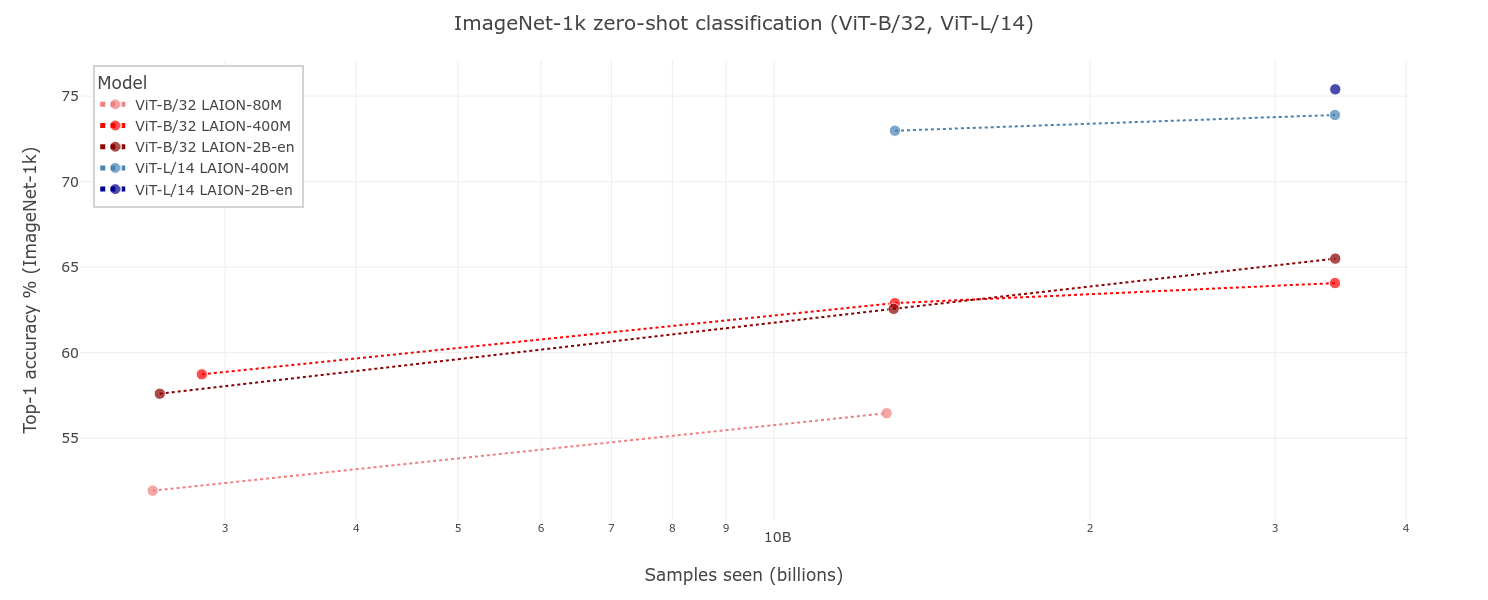

In [137]:
# 80m vs 400m figure
import plotly.express as px
#dd = d
#dd = d[d.dataset=="vtab+"].copy()
#target = "vtab+"
target = "imagenet1k"
pretty = {
    "vtab+": "VTAB+",
    "imagenet1k": "ImageNet-1k"
}[target]
slug = {
    "vtab+": "vtab_plus",
    "imagenet1k": "ImageNet1k"
}[target]
metric = {
    "vtab+": "Avg. top-1 accuracy",
    "imagenet1k": "Top-1 accuracy",
}[target]

#gmacs_vitb32 = act[act.model=="ViT-B-32"].gmacs.values[0]
#gmacs_vitl14 = act[act.model=="ViT-L-14"].gmacs.values[0]
gmacs_vitb32 = 1
gmacs_vitl14 = 1
ddn = [
    #b32
    
    # => 80m
    {"acc1": 51.93, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 80000415 * 32  , "model_fullname": "ViT-B/32 LAION-80M", "model_fullname_pretty": "80M", "data": "LAION-80M", "epochs": 32},
    {"acc1": 56.46, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 80000415 * 160  , "model_fullname": "ViT-B/32 LAION-80M", "model_fullname_pretty": "80M", "data": "LAION-80M", "epochs": 84},
    
    # => 400m
    {"acc1": 58.734, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 407332084 * 7  , "model_fullname": "ViT-B/32 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 32},
    #{"acc1": 58.164, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 407332084 * 6  , "model_fullname": "ViT-B/32 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 32},
    
    {"acc1": 62.9, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 407332084 * 32  , "model_fullname": "ViT-B/32 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 32},
    {"acc1": 64.07, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 407332084 * 84  , "model_fullname": "ViT-B/32 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 80}, 
    
    # => 2b
    

    {"acc1": 57.60, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 13*200*10**6  , "model_fullname": "ViT-B/32 LAION-2B-en", "model_fullname_pretty": "2B", "data": "LAION-2B-en", "epochs": 65},
#    {"acc1": 57.42, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 213334440 * 12  , "model_fullname": "ViT-B/32 LAION-2B-en", "model_fullname_pretty": "2B", "data": "LAION-2B-en", "epochs": 65},

    {"acc1": 62.564, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 65*200*10**6  , "model_fullname": "ViT-B/32 LAION-2B-en", "model_fullname_pretty": "2B", "data": "LAION-2B-en", "epochs": 65},
    {"acc1": 65.5, "dataset": "imagenet1k", "gmacs_total": gmacs_vitb32 * 16*2139877172  , "model_fullname": "ViT-B/32 LAION-2B-en", "model_fullname_pretty": "2B", "data": "LAION-2B-en", "epochs": 16},
    
    #l14
        
    # => 400m
    {"acc1": 72.98, "dataset": "imagenet1k", "gmacs_total": gmacs_vitl14 * 407332084 * 32  , "model_fullname": "ViT-L/14 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 32},
    {"acc1": 73.9, "dataset": "imagenet1k", "gmacs_total": gmacs_vitl14 * 407332084 * 84  , "model_fullname": "ViT-L/14 LAION-400M", "model_fullname_pretty": "400M", "data": "LAION-400M", "epochs": 84},
    
    # => 2b
    #{"acc1": ??, "dataset": "imagenet1k", "gmacs_total": gmacs_vitl14 * 16*2139877172  , "model_fullname": "ViT-L/14 LAION-2B-en", "model_fullname_pretty": "400M", "data": "LAION-2B-en", "epochs": 16},
    {"acc1": 75.4, "dataset": "imagenet1k", "gmacs_total": gmacs_vitl14 * 16*2139877172  , "model_fullname": "ViT-L/14 LAION-2B-en", "model_fullname_pretty": "400M", "data": "LAION-2B-en", "epochs": 16},
    
    
]
ddn = pd.DataFrame(ddn)
ddn = ddn[ddn.dataset==target].copy()
ddn["Dataset"] = ddn["data"]
#ddn["name"] =
ddn["model"] = ddn["model_fullname"].apply(lambda s:s.split()[0])


def func(d):
    model, data = d.model_fullname.split()
    if model == "ViT-B/32":
        if data == "LAION-80M":
            return "lightcoral"
        elif data == "LAION-400M":
            return "red"
        else:
            return "darkred"
    elif model == "ViT-L/14":
        if data == "LAION-80M":
            return "skyblue"
        elif data == "LAION-400M":
            return "steelblue"
        else:
            return "darkblue"
    else:
        print(model)
    
ddn["color"]= ddn.apply(func, axis=1)
print(ddn["color"])

fig = px.scatter(
    data_frame=ddn, 
    x='gmacs_total',
    y='acc1', 
    log_x=False, log_y=True,
    color="data",
    height=500,
    width=600,
    template="none",
)
colors = {
    ddn.loc[idx, "model_fullname"]:ddn.loc[idx, "color"]
    for idx in ddn.index.values
}
ddn["Model"] = ddn["model_fullname"]
#ddn = ddn[ddn.model=="ViT-B/32"]
#ddn = ddn[ddn.model=="ViT-L/14"]
size = 8
ddn["size"] = size
fig=px.scatter(
    data_frame=ddn, 
    x='gmacs_total',
    y='acc1', 
    
    #color="Dataset",
    #line_group="Model",
    #line_dash="",
    color="Model",
    color_discrete_map=colors,
    #markers=True,
    log_x=True, log_y=False,
    height=600,
    width=700,
    size="size",
    size_max=size,
    template="none",
    #line={'dash': 'solid', 'color': 'green'}
    #mode="markers"
    #trendline="lowess",
    #dash="solid",
    #trendline_options=dict(log_x=True, log_y=False),

    #range_x=[0, 280*10**9],
)


fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,
    bordercolor="LightGray",
    borderwidth=2,
))
fig.update_layout(
    title_text=f'{pretty} zero-shot classification (ViT-B/32, ViT-L/14)', 
    title_x=0.5, 
    xaxis_title='Samples seen (billions)', 
    yaxis_title=f'{metric} % ({pretty})',
    font=dict(
         size=14,
    )
)
#print(fig.data[0])
print(len(fig.data))
fig.update_traces(mode='lines+markers')
#for i in range(len(fig.data)):
#    fig.data[i].line.dash = 'dot'
fig.update_traces(patch={"line": {"dash": 'dot'}},) 
fig.write_image(f"samples_seen_vs_top1_{slug}.pdf")
fig.show()